### Tokenization and lower-casing

In [1]:
import nltk

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
# tokenization with plain python
# tokens are basically individual words

text = "To be or not to be"

text_words = text.split(" ") # Tokenize sentence
print(text_words)



#print(set(text_words))
# we should expect len of 4 since "to" and "be" repeat

# BUT WE OBSERVE 5

#print("Unique no. of words: ",len(set(text_words)))
#print((set(text_words)))


['To', 'be', 'or', 'not', 'to', 'be']
{'to', 'be', 'To', 'not', 'or'}


The Unique words in our document is known as the **Vocabulary**. These are esentially the amount of features we have. 

In [21]:
# removes capitals like "To" to get unique words
print(set([i.lower() for i in text_words])) 

{'to', 'or', 'be', 'not'}


Now, let's calculate a measure of the lexical richness (unique words) of the text. The next example shows us that the number of distinct words is 6.6% of the total number of words, or equivalently that each word is used 16 times on average

In [61]:
moby_lex = (len(set(text1))/len(text1))*100
print(moby_lex)

7.406285585022563


In [33]:
moby_true_lex = (set([i.lower() for i in text1])) 

In [36]:
len(moby_true_lex)/len(text1)*100

6.606497226045649

In [7]:
# Via NLTK
words = nltk.word_tokenize("Python is an awesome language!")
words

['Python', 'is', 'an', 'awesome', 'language', '!']

### Searching for Words

In [20]:
import re
re.search(pattern,document) #str.find()
re.search('^The+[0-9]$',text1)

re1 = re.compile('python')
print(bool(re1.match('Python')))

False


There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. 

In [29]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


## Computing Statistics with Text Data

How can we automatically identify the words of a text that are most informative about the topic and genre of the text? Imagine how you might go about finding the 50 most frequent words of a book.

This is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a FreqDist to find the 50 most frequent words of Moby Dick:

In [8]:

f_dist = FreqDist(text1)

In [9]:
print(f_dist)

<FreqDist with 19317 samples and 260819 outcomes>


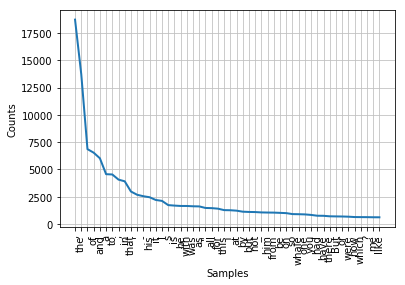

In [10]:
f_dist.plot(50, cumulative=False)

In [50]:
f_dist.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


## Collocations, Unigrams and Bigrams

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This is easily accomplished with the function bigrams()

In [53]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

Collocations are essentially just frequent bigrams, except that we want to pay more attention to the cases that involve rare words. In particular, we want to find bigrams that occur more often than we would expect based on the frequency of the individual words. The  collocations() function does this for us

In [55]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


**Unigram** If bigrams have two-word, unigrams have only one word. 




AttributeError: 'Text' object has no attribute 'unigram'

## Corpus
(Plural: Corpora) a collection of written texts that serve as our datasets.

In [51]:
from nltk.corpus import brown

brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [85]:
brown_tagged_sents

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

In [13]:
nltk.help.upenn_tagset('IN-TL')

No matching tags found.


## Word Tagging and Models

Given any sentence, you can classify each word as a noun, verb, conjunction, or any other class of words. When there are hundreds of thousands of sentences, even millions, this is obviously a large and tedious task. But it's not one that can't be solved computationally. 


### NLTK Parts of Speech Tagger

NLTK is a package in python that provides libraries for different text processing techniques, such as classification, tokenization, stemming, parsing, but important to this example, tagging. 

In [57]:
import nltk 

text = nltk.word_tokenize("Python is an awesome language!")
nltk.pos_tag(text)

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('awesome', 'JJ'),
 ('language', 'NN'),
 ('!', '.')]

In [87]:
# not sure what DD etc. mean?

nltk.help.upenn_tagset()



$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [89]:
import sys
!conda install --yes --prefix {sys.prefix} spacy

/bin/sh: conda: command not found


In [91]:
!{sys.executable} -m pip3 install spacy

/anaconda3/bin/python: No module named pip3
